In [108]:
#importing packages
import pandas as pd
import numpy as np 
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.svm import SVR

In [2]:
covid_data=pd.read_csv("E:/Project's Datasets/Covid World Wide/world_data.csv")
covid_india=pd.read_csv("E:/Project's Datasets/Covid India/India_data.csv")

In [3]:
covid_data.drop(['Lat','Province/State','Active','WHO Region','Long'],axis=1,inplace=True)
covid_data["Date"]=pd.to_datetime(covid_data["Date"])

In [4]:
co=covid_data[['Country/Region','Confirmed',"Deaths","Recovered"]]
world_data=co.groupby(['Country/Region']).agg({"Confirmed":"max","Deaths":"max","Recovered":"max"})
world_data=world_data.sort_values(["Confirmed","Deaths","Recovered"],ascending=[1,1,1])
top=world_data[-5:]

In [5]:
co=covid_data[['Country/Region','Date','Confirmed',"Deaths","Recovered"]]
world_data=co.groupby(['Country/Region','Date']).agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum"})
world_data=world_data.sort_values(["Confirmed","Deaths","Recovered",],ascending=[1,1,1])
for i in range(len(world_data.index)):
    if world_data.index[i][0]==top.index[0]:
        one=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[1]:
        two=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[2]:
        three=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[3]:
        four=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[4]:
        five=world_data.loc[world_data.index[i][0]]
    

C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Statistical Analysis of Confirmed Cases')

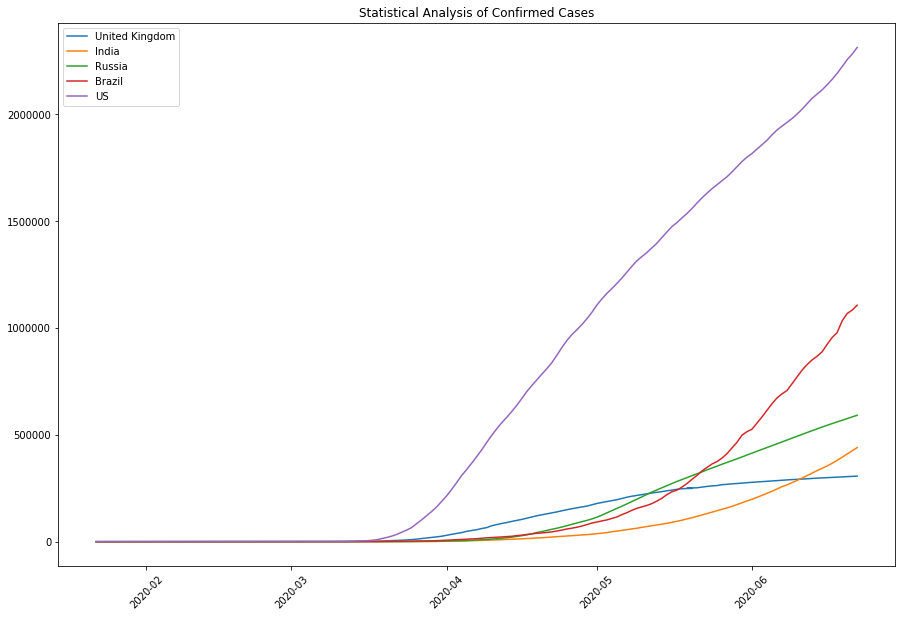

In [6]:
plt.figure (figsize=(15,10))
plt.plot (one.index,one["Confirmed"],label=top.index[0])
plt.plot (two.index,two["Confirmed"],label=top.index[1])
plt.plot (three.index,three["Confirmed"],label=top.index[2])
plt.plot (four.index,four["Confirmed"],label=top.index[3])
plt.plot (five.index,five["Confirmed"],label=top.index[4])
plt.xticks(rotation=45)
plt.legend()
plt.title("Statistical Analysis of Confirmed Cases")

Text(0.5, 1.0, 'Statistical Analysis of Deaths')

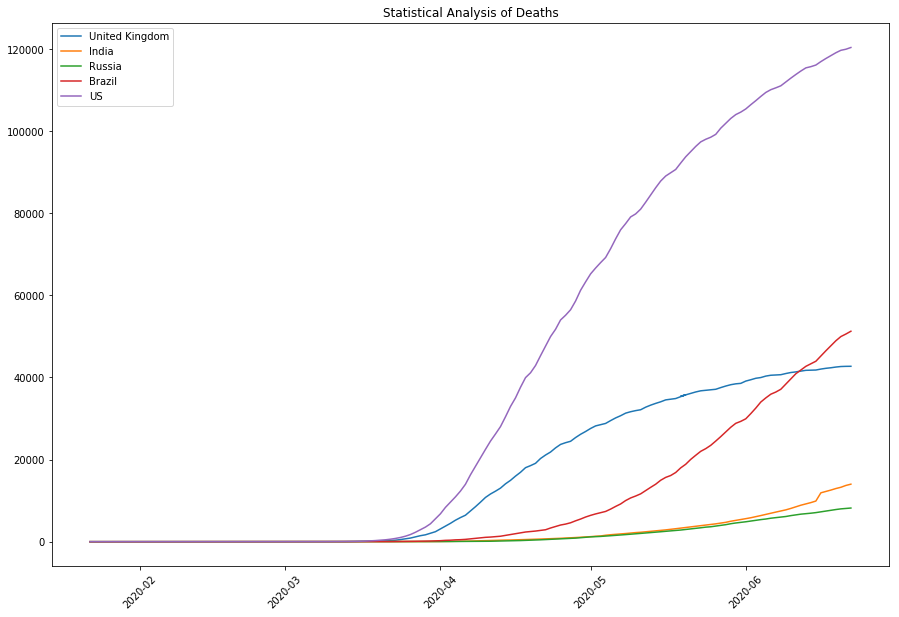

In [7]:
plt.figure (figsize=(15,10))
plt.plot (one.index,one["Deaths"],label=top.index[0])
plt.plot (two.index,two["Deaths"],label=top.index[1])
plt.plot (three.index,three["Deaths"],label=top.index[2])
plt.plot (four.index,four["Deaths"],label=top.index[3])
plt.plot (five.index,five["Deaths"],label=top.index[4])
plt.xticks(rotation=45)
plt.legend()
plt.title("Statistical Analysis of Deaths")

Text(0.5, 1.0, 'Statistical Analysis of Recovered Cases')

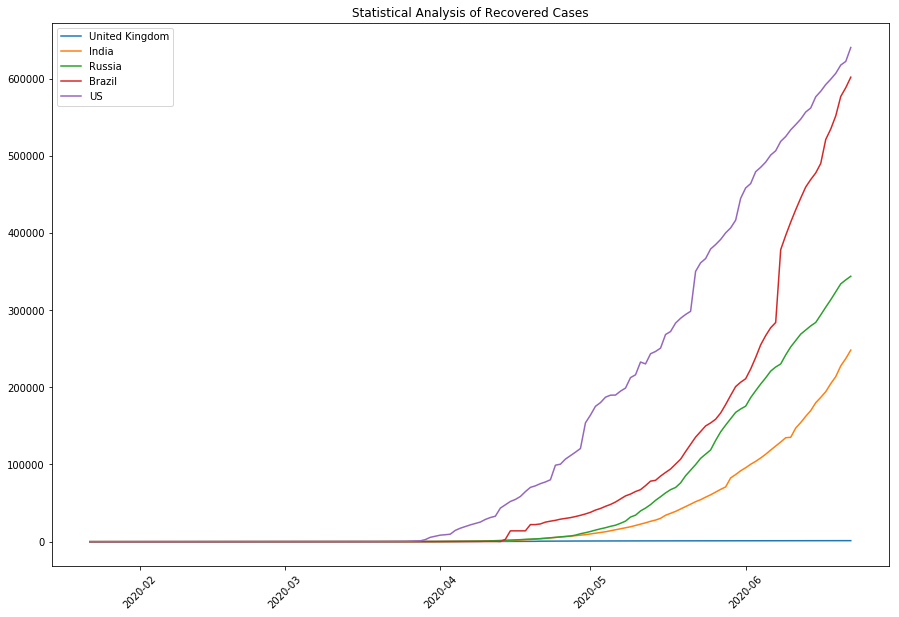

In [8]:
plt.figure (figsize=(15,10))
plt.plot (one.index,one["Recovered"],label=top.index[0])
plt.plot (two.index,two["Recovered"],label=top.index[1])
plt.plot (three.index,three["Recovered"],label=top.index[2])
plt.plot (four.index,four["Recovered"],label=top.index[3])
plt.plot (five.index,five["Recovered"],label=top.index[4])
plt.xticks(rotation=45)
plt.legend()
plt.title("Statistical Analysis of Recovered Cases")

In [9]:
co=covid_data[['Date','Confirmed',"Deaths","Recovered"]]
world_data=co.groupby(['Date']).agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum"})
world_data["Days Since"]=world_data.index-world_data.index[0]
world_data["Days Since"]=world_data["Days Since"].dt.days
bins=np.linspace(min(world_data['Recovered']),max(world_data['Recovered']),4)
group_names=["low","medium","high"]
world_data["Recoverance Rate"]=pd.cut(world_data["Recovered"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(world_data["Confirmed"]),max(world_data["Confirmed"]),4)
world_data["Confirmed Rate"]=pd.cut(world_data["Confirmed"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(world_data["Deaths"]),max(world_data["Deaths"]),4)
world_data["Death Rate"]=pd.cut(world_data["Deaths"],bins,labels=group_names,include_lowest=True)
columns_name=['Days Since','Confirmed','Confirmed Rate','Deaths','Death Rate','Recovered','Recoverance Rate']
world_data_reindex=world_data.reindex(columns=columns_name)
world_data=world_data_reindex
world_data["Confirmed"]=world_data["Confirmed"].astype("int")
world_data["Recovered"]=world_data["Recovered"].astype("int")
world_data["Deaths"]=world_data["Deaths"].astype("int")
world_data.head(10)
world_data.tail(15)

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-08,138,7118614,high,406584,high,3237190,high
2020-06-09,139,7241951,high,411445,high,3318671,high
2020-06-10,140,7375592,high,416654,high,3396704,high
2020-06-11,141,7513983,high,421445,high,3481671,high
2020-06-12,142,7643519,high,425764,high,3560483,high
2020-06-13,143,7778140,high,430031,high,3645598,high
2020-06-14,144,7911685,high,433375,high,3715556,high
2020-06-15,145,8033720,high,436883,high,3794955,high
2020-06-16,146,8173199,high,443669,high,3892350,high


Pridicting Confirmed cases 

In [10]:
train_pr=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_pr=world_data.iloc[int(world_data.shape[0]*0.90):]

Polynomial Regression

In [47]:
pr=PolynomialFeatures(degree=2)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Confirmed"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
pred_pr=lr.predict(te)
rmse=np.sqrt(mean_squared_error(test_pr["Confirmed"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 142932.86093897378


In [14]:
train_lr=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_lr=world_data.iloc[int(world_data.shape[0]*0.90):]

Linear Regression

In [15]:
lr_model=LinearRegression(normalize=True)
lr_model.fit(np.array(train_lr["Days Since"]).reshape(-1,1),np.array(train_lr["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
predict_lr=lr_model.predict(np.array(test_lr["Days Since"]).reshape(-1,1))
rmse=np.sqrt(mean_squared_error(test_lr["Confirmed"],predict_lr))
print("RMSE value for Linear Regression:",rmse)

RMSE value for Linear Regression: 7668662.316007893


In [18]:
train_svm=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_svm=world_data.iloc[int(world_data.shape[0]*0.90):]

Support Vector Machine

In [19]:
svm=SVR(C=3,degree=3,kernel="poly",epsilon=0.01)

In [20]:
svm.fit(np.array(train_svm["Days Since"]).reshape(-1,1),np.array(train_svm["Confirmed"]).reshape(-1,1))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
c=svm.predict(np.array(test_svm["Days Since"]).reshape(-1,1))
rmse=np.sqrt(mean_squared_error(test_svm["Confirmed"],c))
print("RMSE value for SVM:",rmse)

RMSE value for SVM: 1164579.0869916372


In [23]:
pre_poly=[]
s=int(input())
for i in range(1,s+1):
    pre_data_poly=pr.fit_transform(np.array(world_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
pre_poly

10


[9342335.365116473,
 9489187.05529188,
 9637171.138224721,
 9786287.613915006,
 9936536.482362727,
 10087917.743567886,
 10240431.397530487,
 10394077.444250524,
 10548855.883728,
 10704766.715962915]

In [24]:
from datetime import timedelta
pre_date=[]
pre_lr=[]
pre_svm=[]
for i in range(1,s+1):
    pre_date.append(world_data.index[-1]+timedelta(days=i))
    pre_lr.append(lr_model.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    pre_svm.append(svm.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0])

In [25]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_lr,pre_poly,pre_svm),columns=["Date","Linear Regression","Polynomial Regression","SVM"])
model_prediction

,Date,Linear Regression,Polynomial Regression,SVM
0,2020-06-23,6137097.665186,9342335.365116,10833870.309427
1,2020-06-24,6187129.774600,9489187.055292,11047677.746927
2,2020-06-25,6237161.884014,9637171.138225,11264280.004740
3,2020-06-26,6287193.993429,9786287.613915,11483695.239115
4,2020-06-27,6337226.102843,9936536.482363,11705941.606302
5,2020-06-28,6387258.212258,10087917.743568,11931037.231302
6,2020-06-29,6437290.321672,10240431.397530,12159000.293802
7,2020-06-30,6487322.431086,10394077.444251,12389848.918802
8,2020-07-01,6537354.540501,10548855.883728,12623601.262552
9,2020-07-02,6587386.649915,10704766.715963,12860275.465677


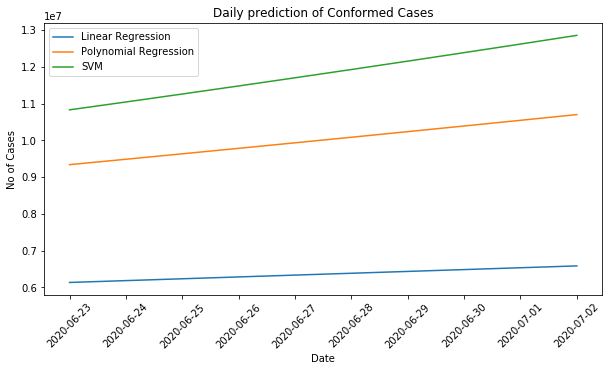

In [26]:
plt.figure(figsize=(10,5))
plt.plot(model_prediction["Date"],model_prediction["Linear Regression"])
plt.plot(model_prediction["Date"],model_prediction["Polynomial Regression"])
plt.plot(model_prediction["Date"],model_prediction["SVM"])
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.title("Daily prediction of Conformed Cases")
plt.xticks(rotation=45)
plt.legend()

Predicting Deaths

Polynomial Regression

In [71]:
pr=PolynomialFeatures(degree=3)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Deaths"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [72]:
pred_pr=lr.predict(te)
rmse=np.sqrt(mean_squared_error(test_pr["Deaths"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 20876.66489832832


Linear Regression

In [73]:
lr_model=LinearRegression(normalize=True)
lr_model.fit(np.array(train_lr["Days Since"]).reshape(-1,1),np.array(train_lr["Deaths"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
predict_lr=lr_model.predict(np.array(test_lr["Days Since"]).reshape(-1,1))
rmse=np.sqrt(mean_squared_error(test_lr["Deaths"],predict_lr))
print("RMSE value for Linear Regression:",rmse)

RMSE value for Linear Regression: 67986.23752706069


Support Vector Machine

In [31]:
svm=SVR(C=2,degree=3,kernel="poly",epsilon=0.01)

In [32]:
svm.fit(np.array(train_svm["Days Since"]).reshape(-1,1),np.array(train_svm["Deaths"]).reshape(-1,1))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
c=svm.predict(np.array(test_svm["Days Since"]).reshape(-1,1))
rmse=np.sqrt(mean_squared_error(test_svm["Deaths"],c))
print("RMSE value for SVM:",rmse)

RMSE value for SVM: 934083.189874989


In [34]:
pre_poly=[]
for i in range(1,s+1):
    pre_data_poly=pr.fit_transform(np.array(world_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
pre_poly

[587792.1684859665,
 596791.9145181326,
 605858.9883848516,
 614993.390086124,
 624195.1196219495,
 633464.1769923281,
 642800.56219726,
 652204.2752367449,
 661675.316110783,
 671213.6848193742]

In [35]:
from datetime import timedelta
pre_date=[]
pre_lr=[]
pre_svm=[]
for i in range(1,s+1):
    pre_date.append(world_data.index[-1]+timedelta(days=i))
    pre_lr.append(lr_model.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    pre_svm.append(svm.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0])

In [36]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_lr,pre_poly,pre_svm),columns=["Date","Linear Regression","Polynomial Regression","SVM"])
model_prediction

,Date,Linear Regression,Polynomial Regression,SVM
0,2020-06-23,397220.732783,587792.168486,1615566.423559
1,2020-06-24,400463.948961,596791.914518,1647466.251684
2,2020-06-25,403707.165139,605858.988385,1679783.064184
3,2020-06-26,406950.381317,614993.390086,1712519.579809
4,2020-06-27,410193.597495,624195.119622,1745678.486059
5,2020-06-28,413436.813673,633464.176992,1779262.509496
6,2020-06-29,416680.029850,642800.562197,1813274.345434
7,2020-06-30,419923.246028,652204.275237,1847716.689184
8,2020-07-01,423166.462206,661675.316111,1882592.282934
9,2020-07-02,426409.678384,671213.684819,1917903.814184


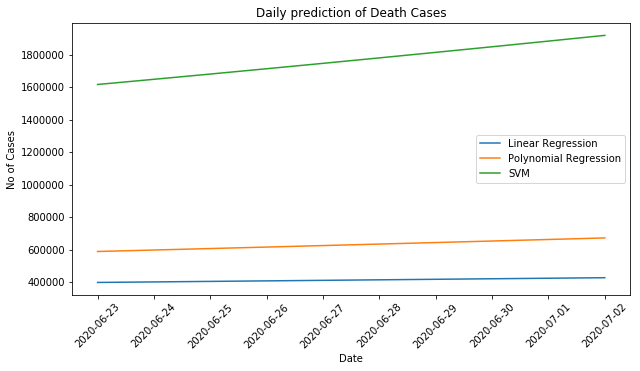

In [76]:
plt.figure(figsize=(10,5))
plt.plot(model_prediction["Date"],model_prediction["Linear Regression"])
plt.plot(model_prediction["Date"],model_prediction["Polynomial Regression"])
plt.plot(model_prediction["Date"],model_prediction["SVM"])
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.title("Daily prediction of Death Cases")
plt.xticks(rotation=45)
plt.legend()

Pridicting Recovery Cases

Polynomial Regression

In [84]:
pr=PolynomialFeatures(degree=3)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Recovered"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [91]:
pred_pr=lr.predict(te)
rmse=np.sqrt(mean_squared_error(test_pr["Recovered"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 24385.15832660189


Linear Regression

In [92]:
lr_model=LinearRegression()
lr_model.fit(np.array(train_lr["Days Since"]).reshape(-1,1),np.array(train_lr["Recovered"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
predict_lr=lr_model.predict(np.array(test_lr["Days Since"]).reshape(-1,1))
rmse=np.sqrt(mean_squared_error(test_lr["Recovered"],predict_lr))
print("RMSE value for Linear Regression:",rmse)

RMSE value for Linear Regression: 1729404.0718118101


Support Vector Machine

In [93]:
svm=SVR(C=3,degree=3,kernel="poly",epsilon=0.01)

In [94]:
svm.fit(np.array(train_svm["Days Since"]).reshape(-1,1),np.array(train_svm["Recovered"]).reshape(-1,1))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
c=svm.predict(np.array(test_svm["Days Since"]).reshape(-1,1))
rmse=np.sqrt(mean_squared_error(test_svm["Recovered"],c))
print("RMSE value for SVM:",rmse)

RMSE value for SVM: 947221.7156600546


In [97]:
pre_poly=[]
for i in range(1,s+1):
    pre_data_poly=pr.fit_transform(np.array(world_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])


In [98]:
from datetime import timedelta
pre_date=[]
pre_lr=[]
pre_svm=[]
for i in range(1,21):
    pre_date.append(world_data.index[-1]+timedelta(days=i))
    pre_lr.append(lr_model.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    pre_svm.append(svm.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0])

In [99]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_lr,pre_poly,pre_svm),columns=["Date","Linear Regression","Polynomial Regression","SVM"])
model_prediction

,Date,Linear Regression,Polynomial Regression,SVM
0,2020-06-23,2244302.139559,4609425.083661,3370016.183974
1,2020-06-24,2263055.850776,4715354.463565,3436653.543349
2,2020-06-25,2281809.561992,4822893.804078,3504161.965224
3,2020-06-26,2300563.273209,4932055.218461,3572547.090224
4,2020-06-27,2319316.984426,5042850.819978,3641814.621474
5,2020-06-28,2338070.695643,5155292.721891,3711970.152724
6,2020-06-29,2356824.406860,5269393.037461,3783019.402724
7,2020-06-30,2375578.118076,5385163.879950,3854967.980849
8,2020-07-01,2394331.829293,5502617.362622,3927821.558974
9,2020-07-02,2413085.540510,5621765.598738,4001585.808974


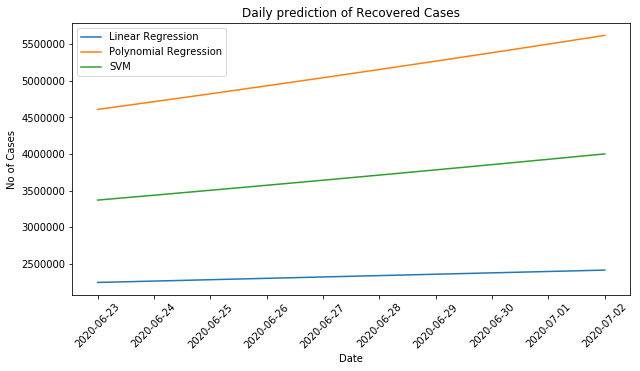

In [100]:
plt.figure(figsize=(10,5))
plt.plot(model_prediction["Date"],model_prediction["Linear Regression"])
plt.plot(model_prediction["Date"],model_prediction["Polynomial Regression"])
plt.plot(model_prediction["Date"],model_prediction["SVM"])
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.title("Daily prediction of Recovered Cases")
plt.xticks(rotation=45)
plt.legend()

# India Covid-19 Prediction

In [103]:
india_data=covid_india.drop(["Latitude","Longitude","New cases","New deaths","New recovered"],axis=1)
india_data["Date"]=pd.to_datetime(india_data["Date"])

In [104]:
co=india_data[['Name of State / UT','Total Confirmed cases',"Death","Cured/Discharged/Migrated"]]
states_data=co.groupby(['Name of State / UT']).agg({"Total Confirmed cases":"max","Death":"max","Cured/Discharged/Migrated":"max"})
states_data=states_data.sort_values(["Total Confirmed cases","Death","Cured/Discharged/Migrated"],ascending=[1,1,1])
states_data.drop('Telengana',inplace=True)

In [106]:
states_data.rename(index={"Andaman and Nicobar Islands":"Andaman & Nicobar Island","Arunachal Pradesh":"Arunanchal Pradesh",
                         "Dadra and Nagar Haveli and Daman and Diu":"Dadara & Nagar Havelli","Jammu and Kashmir":"Jammu & Kashmir",
                         "Union Territory of Ladakh":"Lakshadweep","Delhi":"NCT of Delhi"},inplace=True)
states_data["Name of State / UT"]=states_data.index

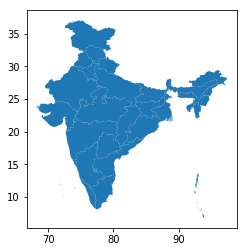

In [110]:
states_locations=gpd.read_file("E:/Project's Datasets/Covid India/Indian States/Indian_states.shp")
states_locations.plot()
#states_locations

In [111]:
merged=states_locations.set_index('st_nm').join(states_data.set_index("Name of State / UT"))
merged

,geometry,Total Confirmed cases,Death,Cured/Discharged/Migrated
st_nm,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",48.000000,0.000000,37.000000
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",139.000000,0.000000,21.000000
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",5586.000000,9.000000,3521.000000
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",7825.000000,55.000000,5781.000000
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",411.000000,6.000000,322.000000
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",2303.000000,12.000000,1513.000000
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",91.000000,0.000000,27.000000
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",nan,nan,nan
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",864.000000,1.000000,152.000000


C:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


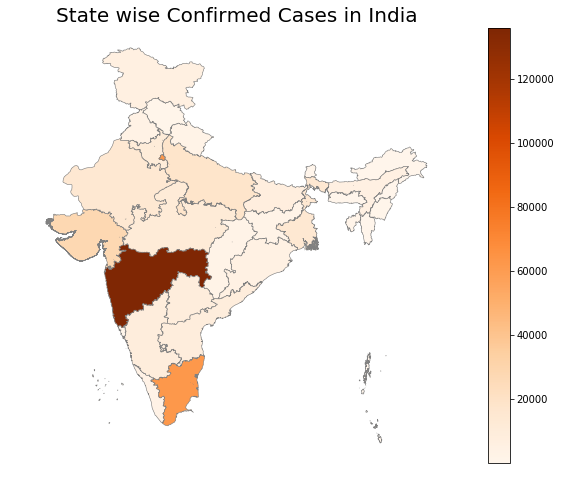

In [112]:
fig,ax=plt.subplots(1,figsize=(15,8))
ax.axis("off")
ax.set_title("State wise Confirmed Cases in India",fontdict={'fontsize':'20','fontweight':'5'})
merged.plot(column="Total Confirmed cases",cmap="Oranges",linewidth=0.6,ax=ax,edgecolor='0.5',legend=True)

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


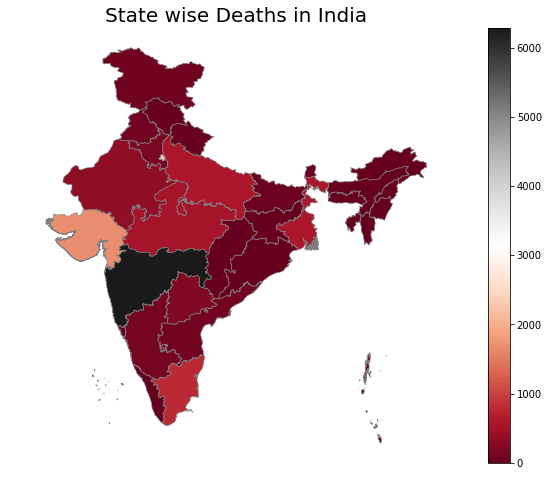

In [113]:
fig,ax=plt.subplots(1,figsize=(15,8))
ax.axis("off")
ax.set_title("State wise Deaths in India",fontdict={'fontsize':'20','fontweight':'5'})
merged.plot(column="Death",cmap="RdGy",linewidth=0.6,ax=ax,edgecolor='0.5',legend=True)

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


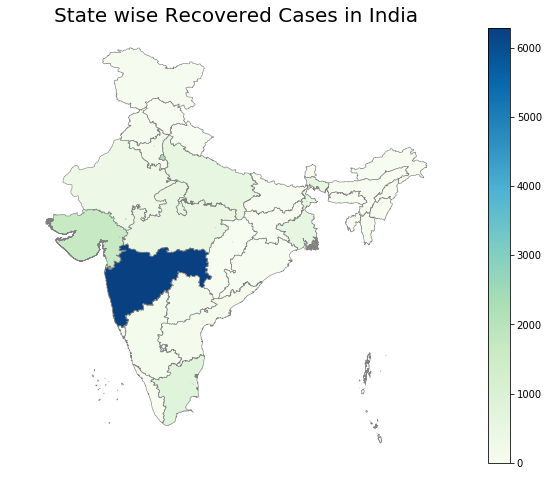

In [114]:
fig,ax=plt.subplots(1,figsize=(15,8))
ax.axis("off")
ax.set_title("State wise Recovered Cases in India",fontdict={'fontsize':'20','fontweight':'5'})
merged.plot(column="Death",cmap="GnBu",linewidth=0.6,ax=ax,edgecolor='0.5',legend=True)

In [115]:
co=india_data[['Date','Total Confirmed cases',"Death","Cured/Discharged/Migrated"]]
india_data=co.groupby(['Date']).agg({"Total Confirmed cases":"sum","Death":"sum","Cured/Discharged/Migrated":"sum"})
india_data=india_data.sort_values(["Total Confirmed cases","Death","Cured/Discharged/Migrated"],ascending=[1,1,1])
india_data["Days Since"]=india_data.index-india_data.index[0]
india_data["Days Since"]=india_data["Days Since"].dt.days
bins=np.linspace(min(india_data['Total Confirmed cases']),max(india_data['Total Confirmed cases']),4)
group_names=["low","medium","high"]
india_data["Confirmed Rate"]=pd.cut(india_data["Total Confirmed cases"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(india_data["Death"]),max(india_data["Death"]),4)
india_data["Death Rate"]=pd.cut(india_data["Death"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(india_data["Cured/Discharged/Migrated"]),max(india_data["Cured/Discharged/Migrated"]),4)
india_data["Recovered Rate"]=pd.cut(india_data["Cured/Discharged/Migrated"],bins,labels=group_names,include_lowest=True)
columns_name=['Days Since','Total Confirmed cases','Confirmed Rate','Death','Death Rate','Cured/Discharged/Migrated','Recovered Rate']
india_data_reindex=india_data.reindex(columns=columns_name)
india_data=india_data_reindex
india_data.tail(10)
india_data

,Days Since,Total Confirmed cases,Confirmed Rate,Death,Death Rate,Cured/Discharged/Migrated,Recovered Rate
Date,,,,,,,
2020-01-30,0,1,low,0,low,0,low
2020-01-31,1,1,low,0,low,0,low
2020-02-01,2,2,low,0,low,0,low
2020-02-02,3,3,low,0,low,0,low
2020-02-03,4,3,low,0,low,0,low
2020-02-04,5,3,low,0,low,0,low
2020-02-05,6,3,low,0,low,0,low
2020-02-06,7,3,low,0,low,0,low
2020-02-07,8,3,low,0,low,0,low


Predicting Confirmed Cases

In [117]:
train_pr=india_data.iloc[:int(india_data.shape[0]*0.90)]
test_pr=india_data.iloc[int(india_data.shape[0]*0.90):]

In [118]:
pr=PolynomialFeatures(degree=5)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Total Confirmed cases"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [119]:
pred_pr=lr.predict(te)
rmse=np.sqrt(mean_squared_error(test_pr["Total Confirmed cases"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 4217.07857135105


In [ ]:
from datetime import timedelta
pre_date=[]
pre_poly=[]
e=int(input())
for i in range(1,e+1):
    pre_date.append(india_data.index[-1]+timedelta(days=i))
    pre_data_poly=pr.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])

In [ ]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_poly),columns=["Date","Total Confirmed Cases"])
model_prediction

Predicting Deaths

In [ ]:
pr=PolynomialFeatures(degree=4)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Death"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

In [ ]:
pred_pr=lr.predict(te)
rmse=np.sqrt(mean_squared_error(test_pr["Death"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

In [ ]:
from datetime import timedelta
pre_date=[]
pre_poly=[]
for i in range(1,e+1):
    pre_date.append(india_data.index[-1]+timedelta(days=i))
    pre_data_poly=pr.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])

In [ ]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_poly),columns=["Date","Deaths"])
model_prediction

Predicting Discharged Cases

In [ ]:
pr=PolynomialFeatures(degree=6)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Cured/Discharged/Migrated"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

In [ ]:
pred_pr=lr.predict(te)

In [ ]:
rmse=np.sqrt(mean_squared_error(test_pr["Cured/Discharged/Migrated"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

In [ ]:
from datetime import timedelta
pre_date=[]
pre_poly=[]
for i in range(1,e+1):
    pre_date.append(india_data.index[-1]+timedelta(days=i))
    pre_data_poly=pr.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])

In [ ]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_poly),columns=["Date","Total Discharged Cases"])
model_prediction